   # Kuramoto model

In [2]:
# Libs
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


 ### 1. Recast equation of motion in a more manageable way
  Start from:

  $r(t)e^{-i\Psi(t)} = \frac{1}{N}\sum_{i=1}^{N} e^{-i\theta_i}$

  Divide real and imaginary part:

  $Re:\;\;\; rcos(-\Psi) = \frac{1}{N}\sum_{i=1}^{N} cos(-\theta)$

  $\;\;\;\;\;\;\;\;\;\; rcos(\Psi) = \frac{1}{N}\sum_{i=1}^{N} cos(\theta)$

  $Im:\;\;\; irsin(-\Psi) = \frac{1}{N}\sum_{i=1}^{N} isin(-\theta)$

  $\;\;\;\;\;\;\;\;\;\; -irsin(\Psi) = \frac{1}{N}\sum_{i=1}^{N} -isin(\theta)$

  $\;\;\;\;\;\;\;\;\;\; irsin(\Psi) = \frac{1}{N}\sum_{i=1}^{N} isin(\theta)$

  finally obtaining the original formulation:

  $r(t)e^{i\Psi(t)} = \frac{1}{N}\sum_{i=1}^{N} e^{i\theta_i}$

  Using this result we can work on the actual equation of motion:

  $\dot{\theta_i}=\omega_i+\frac{K}{N}\sum_{j}\frac{1}{2i}[e^{i(\theta_j - \theta_i)}-e^{-i(\theta_j - \theta_i)}]$

  $\dot{\theta_i}=\omega_i+[\frac{K}{2iN}e^{-i\theta_i}\sum_{j}e^{i\theta_j} - \frac{K}{2iN}e^{i\theta_i}\sum_{j}e^{-i\theta_j}]$

  $\dot{\theta_i}=\omega_i+[\frac{K}{2i}e^{-i\theta_i}r(t)e^{i\Psi(t)} - \frac{K}{2i}e^{i\theta_i}r(t)e^{-i\Psi(t)}]$

  $\dot{\theta_i}=\omega_i+Kr(t)sin(\Psi - \theta_i)$


   ### 2. Solving the system for different values of K

In [3]:
# function d theta / dt
def dtheta_dt(t,thetas,omegas,K):
    global R
    N = len(thetas)
    sum_s = np.sum(np.sin(thetas))
    sum_c = np.sum(np.cos(thetas))
    psi = np.arctan(sum_s/sum_c)
    r = sum_c/(N*np.cos(psi))
    return omegas + K*r*np.sin(psi*np.ones(N)-thetas)




[-0.07243552  1.39101688 -0.20729845  0.86783863  0.37631432 -1.25356163
  0.98992748 -0.08086964  1.62469399  0.56820621]


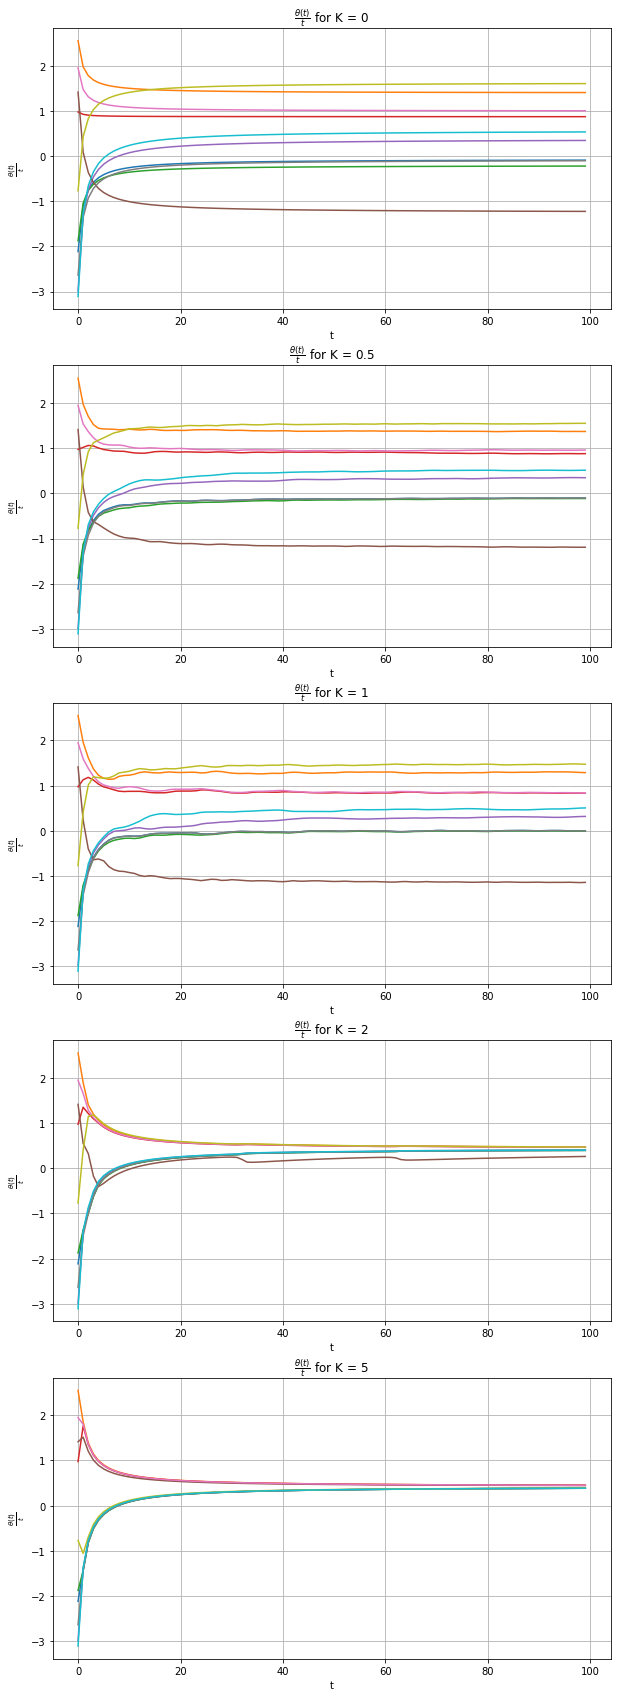

In [4]:
N = 10
K = [0,0.5,1,2,5]
omegas = np.random.normal(size=N)
thetas = np.random.uniform(-np.pi,np.pi,size=N)
t_max = 100
t = np.arange(1,t_max+1)

fig,ax = plt.subplots(len(K),1,figsize=(10,30))

# Solving the motion for different values of K
for i,k in enumerate(K):
    sol = solve_ivp(dtheta_dt,[0,t_max],thetas,args=(omegas,k),t_eval=np.arange(0,t_max))
    for j in np.arange(0,N):
        ax[i].plot(sol.y[j]/t,label='%2f'%(omegas[j]))
    ax[i].set_title(r"$\frac{\theta(t)}{t}$ for K = "+str(k))
    ax[i].grid()
    ax[i].set_ylabel(r'$\frac{\theta(t)}{t}$')
    ax[i].set_xlabel("t")
    #ax[i].legend(loc='upper right',fontsize=15)
print(omegas)

# notice dependence of final state




 #### Considerations:

 The final state of each rotor is characterized by an equilibrium frequency, sensible to initial conditions $\omega_i$ and interaction potential $K$.

 The weaker the interaction, the more probable is not to get any global syncronisation, since the rotors experience a sort of weak mean field potential throughout the orbit.

 Indeed for $K =0$ the equation for $\theta_i(t)$ becomes:

 $\frac{\theta_i(t)}{t} = \frac{\theta_i(0)}{t}+\omega_i$

 i.e. the observed asymptotical behaviour toward $\omega_i$.

 For higher values of $K$ the interactions between the rotors are much more present and drive quickly the system toward a global state at fixed frequency, i.e. a full syncronisation where the memory of the initial $\omega_i$ is lost.



   ### 3.

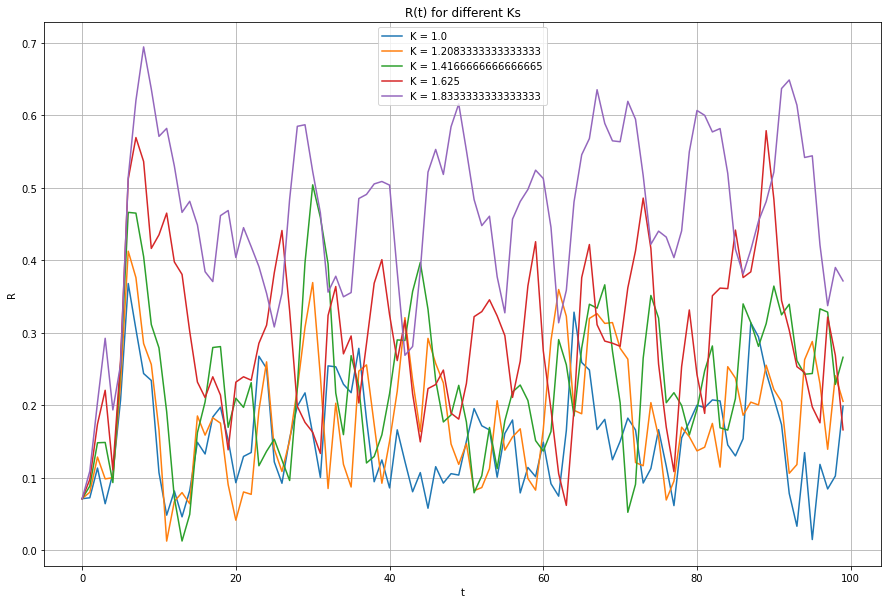

In [7]:
N = 100
K = np.linspace(1,2,25)
omegas = np.random.normal(size=N)
mean_omega = sum(omegas)/N
omegas = omegas - mean_omega
thetas = np.random.uniform(-np.pi,np.pi,size=N)
t_max = 100
t = np.arange(1,t_max+1)

fig,ax = plt.subplots(figsize=(15,10))


for i,k in enumerate(K):
    sol = solve_ivp(dtheta_dt,[0,t_max],thetas,args=(omegas,k),t_eval=np.arange(0,t_max))
    if(i%5==0):
        sum_s = np.sum(np.sin(sol.y),0)
        sum_c = np.sum(np.cos(sol.y),0)
        psi = np.arctan(sum_s/sum_c)
        r = np.abs(sum_c/(N*np.cos(psi)))
        ax.plot(r,label="K = "+str(k))
        ax.set_title("R(t) for different Ks")
        ax.set_ylabel("R")
        ax.set_xlabel("t")
        ax.grid()
    ax.legend()





   ### 4.

In [10]:
N = 100
K = np.linspace(1,2,25)
t_max = 100
N_sim = 100
t = np.arange(1,t_max+1)

R = {k:0 for k in K}

for n_sim in np.arange(0,N_sim):
    omegas = np.random.normal(size=N)
    mean_omega = sum(omegas)/N
    omegas = omegas - mean_omega
    thetas = np.random.uniform(-np.pi,np.pi,size=N)

    for i,k in enumerate(K):
        sol = solve_ivp(dtheta_dt,[0,t_max],thetas,args=(omegas,k),t_eval=np.arange(0,t_max))
        y = sol.y[:,50:]
        sum_s = np.sum(np.sin(y),0)
        sum_c = np.sum(np.cos(y),0)
        psi = np.arctan(sum_s/sum_c)
        r = np.mean(np.abs(sum_c/(N*np.cos(psi))))
        R[k]+=r/N_sim




Text(0.5, 0, 'K')

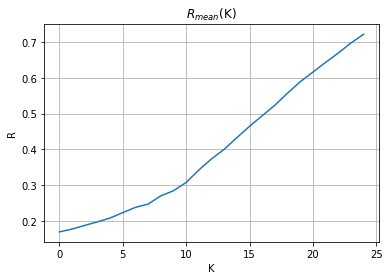

In [11]:
R_mean = [R[k] for k in K]
plt.plot(R_mean)
plt.grid()
plt.title(r"$R_{mean}$(K)")
plt.ylabel('R')
plt.xlabel("K")

   ### 5.

In [ ]:
N = [100,500,2000,5000,15000]
N_rep = [300,100,50,30,10]
K = np.linspace(1,2,25)
t_max = 100
t = np.arange(1,t_max+1)

R_dict = {n:[0 for k in K] for n in N}

for i,n in enumerate(N):
    N_sim = N_rep[i]

    for n_sim in np.arange(0,N_sim):
        omegas = np.random.normal(size=n)
        mean_omega = sum(omegas)/n
        omegas = omegas - mean_omega
        thetas = np.random.uniform(-np.pi,np.pi,size=n)

        for i,k in enumerate(K):
            sol = solve_ivp(dtheta_dt,[0,t_max],thetas,args=(omegas,k),t_eval=np.arange(0,t_max))
            y = sol.y[:,50:]
            sum_s = np.sum(np.sin(y),0)
            sum_c = np.sum(np.cos(y),0)
            psi = np.arctan(sum_s/sum_c)
            r = np.mean(np.abs(sum_c/(n*np.cos(psi))))
            R_dict[n][i]+=r/N_sim
            




In [ ]:
fig,ax = plt.subplots()
for key in R_dict.keys():
    ax.plot(K,R_dict[key],label='$N_{rotors} = $'+str(key))

ax.legend()
ax.grid()
ax.set_title('Average R as function of K and rotors number')
ax.set_xlabel('K')
ax.set_ylabel('R')




   ### 6.
   Assuming normal distribution of omegas (CLT):

   $p(0) = p(\omega=0)_{K} = \frac{1}{\sqrt{2 \pi}}$

   $K_c = \frac{2}{\pi p_0}$

In [ ]:
p_0 = 1/np.sqrt(2*np.pi)
K_c = 2/(np.pi*p_0)
print("K_c = "+str(K_c))


In [ ]:
p_0 = 1/np.sqrt(2*np.pi)
K_c = 2/(np.pi*p_0)

fig,ax = plt.subplots()
for key in R_dict.keys():
    ax.plot(K,R_dict[key],label='$N_{rotors} = $'+str(key))

ax.axvline(x=K_c, label='$K_c$ threshold',color='g', ls='--')

ax.legend()
ax.grid()
ax.set_title('Average R as function of K and rotors number')
ax.set_xlabel('K')
ax.set_ylabel('R')





 #### Consideration:
 The position of $K_c$ is compatible with the R behaviour in the sudden graph.

 We can easily distinguish the inflection point around $K=1.6$ for $N_{rotors}=15000$.